## Creating the CelebA Dataset in h3 format
### Download the following files:
- https://googledrive.com/host/0B7EVK8r0v71pTUZsaXdaSnZBZzg/img_align_celeba.zip
- https://googledrive.com/host/0B7EVK8r0v71pOC0wOVZlQnFfaGs/list_attr_celeba.txt
- The dropbox version is not working as of now, but it you can wget it:
    - `!wget "https://www.dropbox.com/sh/8oqt9vytwxb3s4r/AADIKlz8PR9zr6Y20qbkunrba/Img/img_align_celeba.zip"`


In [ ]:
# This unzips the file in the command line
!unzip -q "img_align_celeba.zip" 

In [1]:
from glob import glob
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline  
import os
import pandas as pd
import h5py
import tqdm

In [2]:
data = glob(os.path.join("../../data/img_align_celeba", "*.jpg"))

In [3]:
data = np.sort(data)

In [4]:
data[0:10]

array(['../../data/img_align_celeba/000001.jpg',
       '../../data/img_align_celeba/000002.jpg',
       '../../data/img_align_celeba/000003.jpg',
       '../../data/img_align_celeba/000004.jpg',
       '../../data/img_align_celeba/000005.jpg',
       '../../data/img_align_celeba/000006.jpg',
       '../../data/img_align_celeba/000007.jpg',
       '../../data/img_align_celeba/000008.jpg',
       '../../data/img_align_celeba/000009.jpg',
       '../../data/img_align_celeba/000010.jpg'], 
      dtype='|S38')

In [5]:
len(data)

202599

In [6]:
def imread(path):
    return scipy.misc.imread(path).astype(np.float)

def resize_width(image, width=64.):
    h, w = np.shape(image)[:2]
    return scipy.misc.imresize(image,[int((float(h)/w)*width),width])
        
def center_crop(x, height=64):
    h= np.shape(x)[0]
    j = int(round((h - height)/2.))
    return x[j:j+height,:,:]

def get_image(image_path, width=64, height=64):
    return center_crop(resize_width(imread(image_path), width = width),height=height)


In [7]:
dim = 64

In [8]:
test = get_image(data[0],dim,dim)

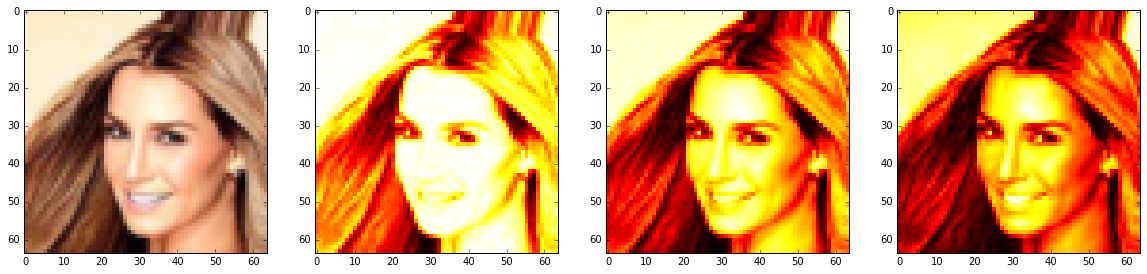

In [9]:
cm = plt.cm.hot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(test, (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(test, (dim,dim,3))[:,:,0], interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(test, (dim,dim,3))[:,:,1], interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(test, (dim,dim,3))[:,:,2], interpolation='nearest', cmap=cm)

In [10]:
images = np.zeros((len(data),dim*dim*3), dtype = np.uint8)

In [11]:
# make a dataset
for i in tqdm.tqdm(range(len(data))):
    #for i in tqdm.tqdm(range(10)):
    image = get_image(data[i], dim,dim)
    images[i] = image.flatten()
    # get the metadata

  2%|▏         | 3267/202599 [00:36<35:44, 92.95it/s]

KeyboardInterrupt: 

In [ ]:
test = images[i].reshape(dim,dim,3)
#test = image.flatten()
cm = plt.cm.hot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(test, (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(test, (dim,dim,3))[:,:,0], interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(test, (dim,dim,3))[:,:,1], interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(test, (dim,dim,3))[:,:,2], interpolation='nearest', cmap=cm)

In [ ]:
attribute_file = 'list_attr_celeba.txt'

In [ ]:
with open(attribute_file, 'r') as f:
    num_examples = f.readline()
    headers = f.readline()

In [ ]:
headers = headers.split()
print headers

In [ ]:
label_input = pd.read_fwf(attribute_file,skiprows=2,
                       widths = [10,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3, 
                                 3,3,3,3,3,3,3,3,3,3,3],
                   index_col=0,
                   header=None
                  )

In [ ]:
# the labels for each input
labels = label_input.astype(int).as_matrix()

In [ ]:
headers

In [ ]:
with h5py.File(''.join(['datasets/faces_dataset_new.h5']), 'w') as f:
    dset_face = f.create_dataset("images", data = images)
    dset_headers = f.create_dataset('headers', data = headers)
    dset_label_input = f.create_dataset('label_input', data = label_input)

In [ ]:
# now reading the dataset is simple...
with h5py.File(''.join(['datasets/faces_dataset_new.h5']), 'r') as hf:
    faces = hf['images'].value
    headers = hf['headers'].value
    labels = hf['label_input'].value

### Lets take a look at some bald people

In [ ]:
bald_people = faces[labels[:,4]==1][0:4]

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(bald_people[0], (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(bald_people[1], (dim,dim,3)), interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(bald_people[2], (dim,dim,3)), interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(bald_people[3], (dim,dim,3)), interpolation='nearest', cmap=cm)